In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from kmodes.kmodes import KModes
from sklearn import preprocessing
from sklearn import utils
from sklearn.metrics import silhouette_samples, silhouette_score
%matplotlib inline
sb.set()

## IMPORTING AND CLEANING DATASET

In [2]:
#IMPORTING ANIME.CSV

animeDF = pd.read_csv('anime.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,48,49,50,51,52,53,54,55,58,59,60,67,68,69,70,71,72,73,74,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [3]:
animeDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17562 entries, 0 to 17561
Data columns (total 99 columns):
 #   Column                 Non-Null Count  Dtype 
---  ------                 --------------  ----- 
 0   MAL_ID                 17562 non-null  int64 
 1   Name                   17562 non-null  object
 2   Score                  17562 non-null  object
 3   Genres                 17562 non-null  object
 4   Genre 1                17562 non-null  object
 5   Genre2                 13270 non-null  object
 6   Genre 2                13270 non-null  object
 7   Genre3                 9029 non-null   object
 8   Genre 3                9029 non-null   object
 9   Genre4                 5534 non-null   object
 10  Genre 4                5534 non-null   object
 11  Genre5                 2959 non-null   object
 12  Genre 5                2959 non-null   object
 13  Genre6                 1237 non-null   object
 14  Genre 6                1237 non-null   object
 15  Genre7             

In [4]:
animeDF.head()

,MAL_ID,Name,Score,Genres,Genre 1,Genre2,Genre 2,Genre3,Genre 3,Genre4,...,Score-9,Score-8,Score-7,Score-6,Score-5,Score-4,Score-3,Score-2,Score-1,High Score Percentage
0,1,Cowboy Bebop,8.78,"Action, Adventure, Comedy, Drama, Sci-Fi, Space",Action,Adventure,Adventure,Comedy,Comedy,Drama,...,182126,131625,62330,20688,8904,3184,1357,741,1580,0.846060106
1,5,Cowboy Bebop: Tengoku no Tobira,8.39,"Action, Drama, Mystery, Sci-Fi, Space",Action,Drama,Drama,Mystery,Mystery,Sci-Fi,...,49201,49505,22632,5805,1877,577,221,109,379,0.802929859
2,6,Trigun,8.24,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen",Action,Sci-Fi,Sci-Fi,Adventure,Adventure,Comedy,...,75651,86142,49432,15376,5838,1965,664,316,533,0.740957413
3,7,Witch Hunter Robin,7.27,"Action, Mystery, Police, Supernatural, Drama, ...",Action,Mystery,Mystery,Police,Police,Supernatural,...,4806,10128,11618,5709,2920,1083,353,164,131,0.437816545
4,8,Bouken Ou Beet,6.98,"Adventure, Fantasy, Shounen, Supernatural",Adventure,Fantasy,Fantasy,Shounen,Shounen,Supernatural,...,529,1242,1713,1068,634,265,83,50,27,0.351679892


## EXPLORATORY DATA ANALYSIS

In [5]:
#AGE RATING DISTRIBUTION

#WHICH STUDIO PRODUCED THE MOST ANIME?

animeDF['Rating'].isna().sum() #checking for NaN values

0

In [6]:
#REMOVING UNKNOWN VALUES IN RATINGS

StudiosDF = animeDF[animeDF['Rating'] != 'Unknown'] 
StudiosDF['Rating'].describe()

count                         16874
unique                            6
top       PG-13 - Teens 13 or older
freq                           6132
Name: Rating, dtype: object

In [7]:
#REMOVING HENTAI IN RATINGS

StudiosDF1 = StudiosDF[StudiosDF['Rating'] != 'Rx - Hentai'] 

In [8]:
#PRINTING OUT ALL UNIQUE RATINGS

n = 5
Ratings = StudiosDF1['Rating'].value_counts()[:n].to_dict()
print(Ratings)

{'PG-13 - Teens 13 or older': 6132, 'G - All Ages': 5782, 'PG - Children': 1461, 'R - 17+ (violence & profanity)': 1157, 'R+ - Mild Nudity': 997}


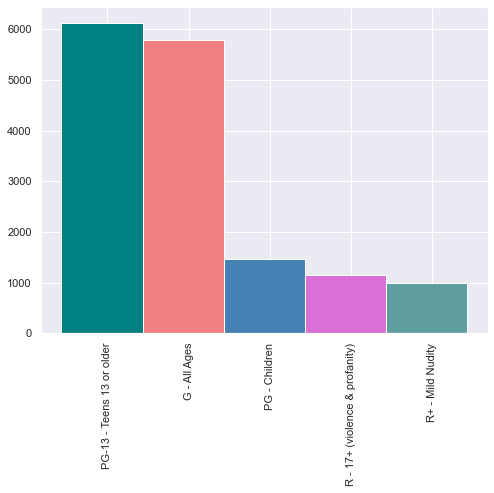

In [9]:
#HIST PLOT FOR RATINGS

fig = plt.figure(figsize=(8,6)) #sets a different size (inches wide, inches tall)
ax = plt.subplot(111)
c = ['teal', 'lightcoral',  'steelblue', 'orchid', 'cadetblue']
width=2.0
ax.bar(range(0,len(Ratings.keys())), Ratings.values(), width=width/2, color = c)
ax.set_xticks(np.arange(0,len(Ratings.keys())) + width/30)
ax.set_xticklabels(Ratings.keys())

locs, labels = plt.xticks() #gets labels
plt.setp(labels, rotation=90) #sets rotation of the labels

plt.show()

## ANALYSIS ON RATINGS

In [38]:
#DISPLAYING THE COUNTS 

Ratingscount = pd.DataFrame.from_dict(Ratings, orient='index')
Ratingscount.rename(columns = {0: 'Count'}, inplace = True)
Ratingscount

,Count
PG-13 - Teens 13 or older,6132
G - All Ages,5782
PG - Children,1461
R - 17+ (violence & profanity),1157
R+ - Mild Nudity,997


In [10]:
#IMPORTING ANIME.CSV

animeDF = pd.read_csv('anime.csv')

/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (19,20,21,22,23,24,25,26,27,28,48,49,50,51,52,53,54,55,58,59,60,67,68,69,70,71,72,73,74,87,88) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [11]:
#CREATING RATINGSDF, WITH ONLY RATINGS AND COMPLETION PERCENTAGE AS INPUTS

ratingsDF = animeDF[['Rating','Completion Percentage']]

In [12]:
ratingsDF.describe()

,Rating,Completion Percentage
count,17562,17562
unique,7,14934
top,PG-13 - Teens 13 or older,#DIV/0!
freq,6132,295


In [13]:
#REMOVING 'RX-HENTAI' DUE TO ITS LARGE UNKNOWN VALUE COUNTS AS WELL AS INAPPROPRIATENESS

ratingsDFClean = ratingsDF[ratingsDF['Rating'] != 'Rx - Hentai']

In [14]:
#REMOVING ALL ROWS WITH UNKNOWN VALUES

ratingsDFClean = ratingsDFClean[ratingsDFClean['Rating'] != 'Unknown'] 

In [15]:
#REMOVING '#DIV/0' VALUES IN COMPLETION PERCENTAGE

ratingsDFClean = ratingsDFClean[ratingsDFClean['Completion Percentage'] != '#DIV/0!'] 

In [16]:
#CHANGING 'COMPLETION PERCENTAGE' TO NUMERIC VALUES

ratingsDFClean['Completion Percentage'] = pd.to_numeric(ratingsDFClean['Completion Percentage'])

In [17]:
ratingsDFClean.describe()

,Completion Percentage
count,15434.000000
mean,0.791946
std,0.201781
min,0.000000
25%,0.697348
50%,0.864865
75%,0.939782
max,1.000000


In [18]:
ratingsDFClean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15434 entries, 0 to 17560
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Rating                 15434 non-null  object 
 1   Completion Percentage  15434 non-null  float64
dtypes: float64(1), object(1)
memory usage: 361.7+ KB


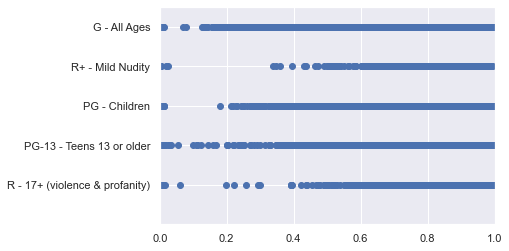

In [19]:
#SCATTER PLOT BEFORE KMODES CLUSTERING

plt.scatter(ratingsDFClean['Completion Percentage'],ratingsDFClean['Rating'])
plt.xlim(0,1)
plt.ylim(-1,4.5)
plt.show()

## ENCODING

In [20]:
ratingsDFClean['Rating'].unique()

array(['R - 17+ (violence & profanity)', 'PG-13 - Teens 13 or older',
       'PG - Children', 'R+ - Mild Nudity', 'G - All Ages'], dtype=object)

In [21]:
#LABEL ENCODING RATINGS COLUMN VALUES TO BECOME MULTICLASS FOR KMODES ANALYSIS

lab_enc = preprocessing.LabelEncoder()
ratings_encoded = lab_enc.fit_transform(ratingsDFClean['Rating'])
print(ratings_encoded)
print(utils.multiclass.type_of_target(ratings_encoded))
print(utils.multiclass.type_of_target(ratings_encoded.astype('int')))
print(utils.multiclass.type_of_target(ratings_encoded))

[3 3 2 ... 2 2 2]
multiclass
multiclass
multiclass


In [22]:
#INITIALISE X AND Y

X = ratings_encoded.reshape(-1,1)
y = ratingsDFClean['Completion Percentage']

## ELBOW TEST FOR APPROPRIATE K-MODES VALUE

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 9361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 9361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 9361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 9361.0
Best run was number 1
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 3588.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 9361.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Ru

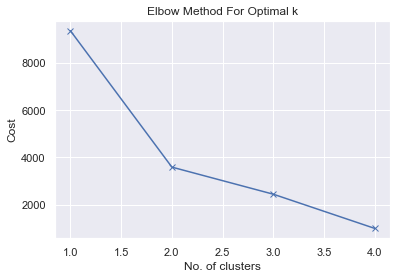

In [23]:
#ELBOW CURVE TEST TO DETERMINE APPROPRIATE K-VALUE

cost = []
K = range(1,5)
for num_clusters in list(K):
    kmode = KModes(n_clusters=num_clusters, init = "random", n_init = 5, verbose=1)
    kmode.fit_predict(X)
    cost.append(kmode.cost_)
    
plt.plot(K, cost, 'bx-')
plt.xlabel('No. of clusters')
plt.ylabel('Cost')
plt.title('Elbow Method For Optimal k')
plt.show()

## K-MODES ALGORITHM

In [24]:
#BUILDING MODELS WITH 3 CLUSTERS

kmode = KModes(n_clusters=3, init = "random", n_init = 5, verbose=1)
clusters = kmode.fit_predict(X)
clusters

Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 1, iteration: 1/100, moves: 0, cost: 2595.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 2, iteration: 1/100, moves: 0, cost: 3588.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 3, iteration: 1/100, moves: 0, cost: 2441.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 4, iteration: 1/100, moves: 0, cost: 3588.0
Init: initializing centroids
Init: initializing clusters
Starting iterations...
Run 5, iteration: 1/100, moves: 0, cost: 3588.0
Best run was number 3


array([1, 1, 0, ..., 0, 0, 0], dtype=uint16)

In [25]:
#APPENDING CLUSTERS TO RATINGS DATAFRAME

ratingsDFClean.insert(0, "Cluster", clusters, True)

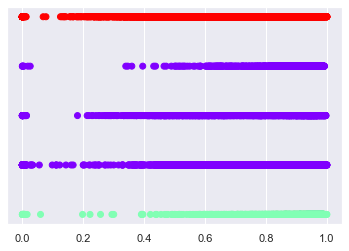

In [26]:
#NEW SCATTER PLOT AFTER KMODES CLUSTERING

data_with_clusters = ratingsDFClean.copy()
data_with_clusters['Clusters'] = clusters 
plt.scatter(data_with_clusters['Completion Percentage'],data_with_clusters['Rating'],c=data_with_clusters['Clusters'],cmap='rainbow')
plt.yticks([])
plt.show()

In [27]:
#JUST TO ILLUSTRATE NEW DATAFRAME 

ratingsDFClean.head()

,Cluster,Rating,Completion Percentage
0,1,R - 17+ (violence & profanity),0.879720
1,1,R - 17+ (violence & profanity),0.987182
2,0,PG-13 - Teens 13 or older,0.897122
3,0,PG-13 - Teens 13 or older,0.814715
4,0,PG - Children,0.796038


## SPLITTING INDIVIDUAL CLUSTERS WITH ANALYSIS

In [28]:
#CREATING CLUSTER 0 DATAFRAME WITH CLUSTER 0 VALUES

Cluster0DF = ratingsDFClean.query('Cluster == 0')
print(Cluster0DF)

       Cluster                     Rating  Completion Percentage
2            0  PG-13 - Teens 13 or older               0.897122
3            0  PG-13 - Teens 13 or older               0.814715
4            0              PG - Children               0.796038
5            0  PG-13 - Teens 13 or older               0.752271
6            0  PG-13 - Teens 13 or older               0.779701
...        ...                        ...                    ...
17538        0  PG-13 - Teens 13 or older               1.000000
17540        0  PG-13 - Teens 13 or older               0.160000
17549        0  PG-13 - Teens 13 or older               0.363636
17552        0  PG-13 - Teens 13 or older               0.986045
17560        0  PG-13 - Teens 13 or older               0.400000

[8514 rows x 3 columns]


In [29]:
#UNIQUE AGE RATINGS IN CLUSTER 0
Cluster0DF.Rating.unique()

array(['PG-13 - Teens 13 or older', 'PG - Children', 'R+ - Mild Nudity'],
      dtype=object)

In [30]:
#CLUSTER 0 STATISTICS
Cluster0DF.describe()

,Cluster,Completion Percentage
count,8514.0,8514.000000
mean,0.0,0.820757
std,0.0,0.183817
min,0.0,0.000000
25%,0.0,0.757027
50%,0.0,0.885728
75%,0.0,0.947540
max,0.0,1.000000


In [31]:
#CREATING CLUSTER 1 DATAFRAME WITH CLUSTER 1 VALUES

Cluster1DF = ratingsDFClean.query('Cluster == 1')
print(Cluster1DF)

       Cluster                          Rating  Completion Percentage
0            1  R - 17+ (violence & profanity)               0.879720
1            1  R - 17+ (violence & profanity)               0.987182
15           1  R - 17+ (violence & profanity)               0.791165
17           1  R - 17+ (violence & profanity)               0.827863
21           1  R - 17+ (violence & profanity)               0.986305
...        ...                             ...                    ...
17494        1  R - 17+ (violence & profanity)               0.000000
17513        1  R - 17+ (violence & profanity)               0.962311
17519        1  R - 17+ (violence & profanity)               0.300000
17543        1  R - 17+ (violence & profanity)               0.294118
17544        1  R - 17+ (violence & profanity)               0.222222

[1147 rows x 3 columns]


In [32]:
#UNIQUE AGE RATINGS IN CLUSTER 1
Cluster1DF.Rating.unique()

array(['R - 17+ (violence & profanity)'], dtype=object)

In [33]:
#CLUSTER 1 STATISTICS
Cluster1DF.describe()

,Cluster,Completion Percentage
count,1147.0,1147.000000
mean,1.0,0.862097
std,0.0,0.155416
min,1.0,0.000000
25%,1.0,0.824079
50%,1.0,0.912369
75%,1.0,0.959550
max,1.0,1.000000


In [34]:
#CREATING CLUSTER 2 DATAFRAME WITH CLUSTER 2 VALUES

Cluster2DF = ratingsDFClean.query('Cluster == 2')
print(Cluster2DF)

       Cluster        Rating  Completion Percentage
54           2  G - All Ages               0.908773
82           2  G - All Ages               0.721201
122          2  G - All Ages               0.891114
140          2  G - All Ages               0.818306
155          2  G - All Ages               0.839234
...        ...           ...                    ...
17447        2  G - All Ages               1.000000
17448        2  G - All Ages               1.000000
17449        2  G - All Ages               1.000000
17452        2  G - All Ages               0.611111
17505        2  G - All Ages               0.983871

[5773 rows x 3 columns]


In [35]:
#UNIQUE AGE RATINGS IN CLUSTER 2
Cluster2DF.Rating.unique()

array(['G - All Ages'], dtype=object)

In [36]:
#CLUSTER 2 STATISTICS
Cluster2DF.describe()

,Cluster,Completion Percentage
count,5773.0,5773.000000
mean,2.0,0.735516
std,0.0,0.221013
min,2.0,0.000000
25%,2.0,0.582418
50%,2.0,0.802395
75%,2.0,0.919383
max,2.0,1.000000


<AxesSubplot:xlabel='Cluster', ylabel='Completion Percentage'>

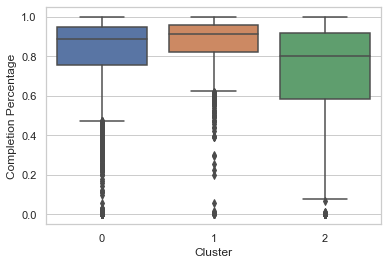

In [37]:
#COMBINED BOXPLOT OF THE 3 CLUSTERS

sb.set_style("whitegrid")
  
sb.boxplot(x = 'Cluster', y = 'Completion Percentage', data = ratingsDFClean)

### Cluster 2 consisting of R-17+ (Violence & Profanity) seem to be the best due to its highest Median Completion Percentage as well as it's smallest Inter-quartile Range. This is consistent with current trends, as very popular animes such as Demon Slayer, Attack on Titan and Psycho-Pass all belong to that genre.